<a href="https://colab.research.google.com/github/DemitriusBR/Desafio_DNC---Python-Machine-Learning-/blob/main/Projeto_7_att.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bibliotecas**

In [ ]:
# Bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans as Kmeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

# **Carregamento do DataFrame**


In [ ]:
df = pd.read_csv("Desafio 7.csv", sep = ",", encoding='latin-1')
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# **Análise Estatisticas**

In [ ]:
# Analise estatisticas do DF
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Verificação da estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# ***Limpeza dos dados***



In [1]:
# Retirando coluna que não será nescessaria
df = df.drop(columns=["StockCode"])

NameError: name 'df' is not defined

In [ ]:
# Contagem de linhas duplicadas
Duplicadas = df.duplicated().sum()
print("Quantidade de Linhas Duplicadas",Duplicadas)

Quantidade de Linhas Duplicadas 5338


In [ ]:
# Dropando as linhas que são duplicadas
df= df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536571 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536571 non-null  object 
 1   Description  535117 non-null  object 
 2   Quantity     536571 non-null  int64  
 3   InvoiceDate  536571 non-null  object 
 4   UnitPrice    536571 non-null  float64
 5   CustomerID   401568 non-null  float64
 6   Country      536571 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [ ]:
# Dropando os as linhas que contenham dados nullos
df.dropna(inplace=True)

In [ ]:
# Verificando a estrutura do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401568 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401568 non-null  object 
 1   Description  401568 non-null  object 
 2   Quantity     401568 non-null  int64  
 3   InvoiceDate  401568 non-null  object 
 4   UnitPrice    401568 non-null  float64
 5   CustomerID   401568 non-null  float64
 6   Country      401568 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [ ]:
# Convertendo todos os valores na coluna 'InvoiceNo' para strings
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Remover linhas com valores não numéricos na coluna 'InvoiceNo'
df = df[df['InvoiceNo'].str.isnumeric()]

# Converter para tipo inteiro
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

# Convertendo o ID para int
df[["CustomerID"]] = df[["CustomerID"]].astype(int)

# Dividindo os valores para pegar apenas a parte da data
df['InvoiceDate'] = df['InvoiceDate'].str.split().str[0]

# Convertendo para o formato de data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y")
df.head()

<ipython-input-10-3f7346ab10a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = df['InvoiceNo'].astype(int)
<ipython-input-10-3f7346ab10a1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["CustomerID"]] = df[["CustomerID"]].astype(int)


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [ ]:
# Verificando a estrutura do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392697 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392697 non-null  int64         
 1   Description  392697 non-null  object        
 2   Quantity     392697 non-null  int64         
 3   InvoiceDate  392697 non-null  datetime64[ns]
 4   UnitPrice    392697 non-null  float64       
 5   CustomerID   392697 non-null  int64         
 6   Country      392697 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 24.0+ MB


In [ ]:
# Criação de nova linha, Valor total é a quantidade total gasta na compra
df["Valor total"]= df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Valor total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [ ]:
# Dropar todas as linhas onde 'Quantity ou UnitPrice' seja menor que zero
df.drop(df[df['Quantity'] < 0].index, inplace=True)
df.drop(df[df['UnitPrice'] <= 0].index, inplace=True)
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Valor total
count,392657.000000,392657.000000,392657,392657.000000,392657.000000,392657.000000
mean,560591.734366,13.120143,2011-07-10 06:10:21.116139776,3.126100,15287.827972,22.633072
min,536365.000000,1.000000,2010-12-01 00:00:00,0.001000,12346.000000,0.001000
25%,549235.000000,2.000000,2011-04-07 00:00:00,1.250000,13955.000000,4.950000
50%,561874.000000,6.000000,2011-07-31 00:00:00,1.950000,15150.000000,12.450000
75%,572061.000000,12.000000,2011-10-20 00:00:00,3.750000,16791.000000,19.800000
max,581587.000000,80995.000000,2011-12-09 00:00:00,8142.750000,18287.000000,168469.600000
std,13086.930671,180.500842,NaN,22.242818,1713.536509,311.113042


**Retirada dos Outlines do DF base**

<Axes: >

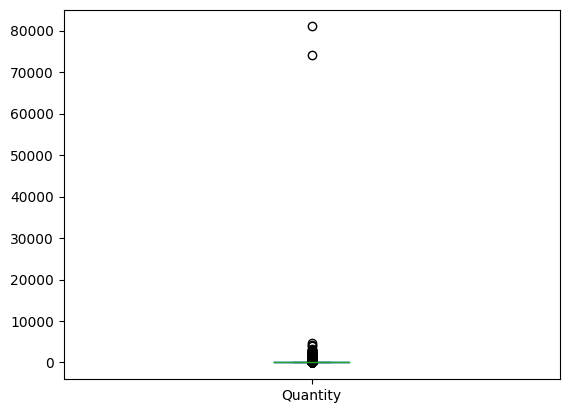

In [ ]:
# Analisando a quantidade de Outlines do DF na coluna Quantity
df[["Quantity"]].plot.box()

<Axes: >

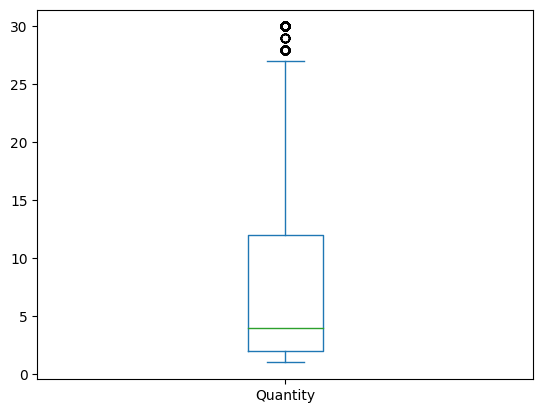

In [ ]:
#Dropando os Outlines que possui uma quantidade maior que 30
df.drop(df[df['Quantity'] >30].index, inplace=True)
df[df['Quantity'] > 12]
df["Quantity"].plot.box()

<Axes: >

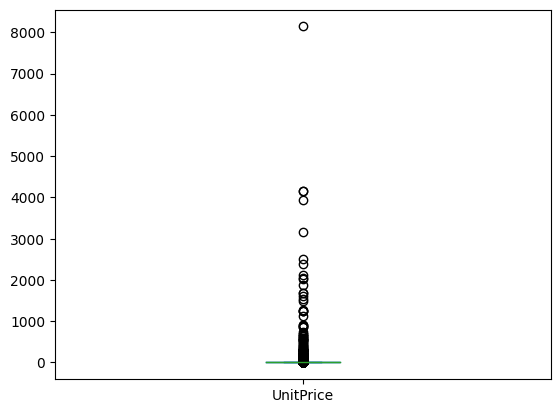

In [ ]:
# Analisando a quantidade de Outlines do DF na coluna UnitPrice
df[["UnitPrice"]].plot.box()

<Axes: >

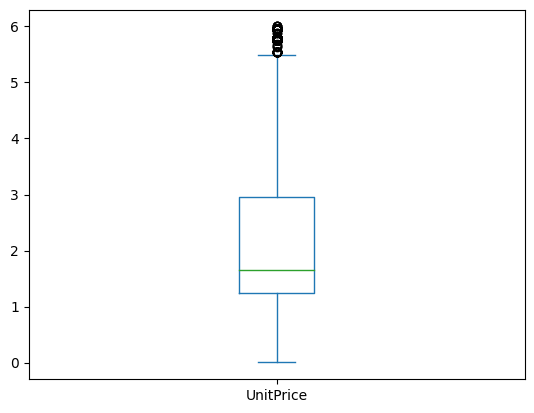

In [ ]:
# Dropando as linhas que possui UnitPrice maior que 6
df.drop(df[df['UnitPrice'] >6].index, inplace=True)
df[df['UnitPrice'] > 3.75]
df["UnitPrice"].plot.box()

In [ ]:
# Analise Estatisticas após a retirados dos DF
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Valor total
count,327700.000000,327700.000000,327700,327700.000000,327700.000000,327700.000000
mean,560802.406002,7.692304,2011-07-11 23:24:17.005797888,2.099076,15317.894498,12.666888
min,536365.000000,1.000000,2010-12-01 00:00:00,0.001000,12347.000000,0.001000
25%,549304.000000,2.000000,2011-04-08 00:00:00,1.250000,13985.000000,3.900000
50%,562161.000000,6.000000,2011-08-03 00:00:00,1.650000,15235.000000,10.080000
75%,572287.000000,12.000000,2011-10-23 00:00:00,2.950000,16814.000000,17.400000
max,581587.000000,30.000000,2011-12-09 00:00:00,6.000000,18287.000000,178.500000
std,13121.857751,6.914957,NaN,1.413736,1712.648043,12.606204


# **Agrupamento dos clientes utilizando o modelo RFM**

In [ ]:
# Verificando qual a ultima data de venda
lastdate = df['InvoiceDate'].max()
print(lastdate)

# Calculando somente a Recência de cada cliente
r_only = []

for v in df['CustomerID'].unique():
    customer = df.loc[df['CustomerID'] == v]
    values = {'CustomerID': v, 'LastPurchase': customer['InvoiceDate'].max()}
    r_only.append(values)

r_only = pd.DataFrame(r_only)
r_only['Recency'] = (lastdate - r_only['LastPurchase']).dt.days
r_only.drop('LastPurchase', axis=1, inplace=True)
r_only

2011-12-09 00:00:00


,CustomerID,Recency
0,17850,372
1,13047,31
2,12583,2
3,14688,7
4,17809,16
...,...,...
4183,13436,1
4184,15520,1
4185,13298,1
4186,14569,1


In [ ]:
# Calculando somente a Frequência de cada Cliente
f_only = []

for v in df['CustomerID'].unique():
    customer = df.loc[df['CustomerID'] == v]
    values = {'CustomerID': v, 'Frequency': customer['InvoiceNo'].count()}
    f_only.append(values)

f_only = pd.DataFrame(f_only)
f_only

,CustomerID,Frequency
0,17850,259
1,13047,145
2,12583,202
3,14688,292
4,17809,27
...,...,...
4183,13436,8
4184,15520,17
4185,13298,1
4186,14569,9


In [ ]:
# Calculando somente o valor médio gasto por cliente
m_only = []

for v in df['CustomerID'].unique():
    customer = df.loc[df['CustomerID'] == v]
    values = {'CustomerID': v, 'Monetary': customer['Valor total'].mean()}
    m_only.append(values)

m_only = pd.DataFrame(m_only)
m_only

,CustomerID,Monetary
0,17850,15.886718
1,13047,17.767310
2,12583,25.701436
3,14688,13.719760
4,17809,27.016667
...,...,...
4183,13436,14.192500
4184,15520,18.864706
4185,13298,90.000000
4186,14569,8.898889


In [ ]:
# Criando a tabela final com o RFM completo
final_rfm = r_only.merge(f_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.merge(m_only, left_on='CustomerID', right_on='CustomerID')
final_rfm.head(10).style.format('{:.2f}', subset='Monetary')

,CustomerID,Recency,Frequency,Monetary
0,17850,372,259,15.89
1,13047,31,145,17.77
2,12583,2,202,25.70
3,14688,7,292,13.72
4,17809,16,27,27.02
5,15311,0,1851,8.36
6,16098,87,54,20.51
7,18074,373,6,20.71
8,17420,50,25,19.40
9,16250,261,22,15.75


# **Retirada dos Outlines do modelo RFM**

In [ ]:
px.scatter_matrix(final_rfm, dimensions=['Recency', 'Frequency', 'Monetary'], color='CustomerID')

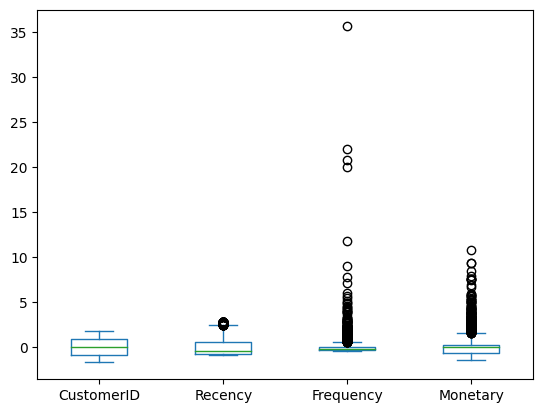

In [ ]:
# Alterando a escala do DF_RFM
scaled_data = final_rfm.apply(scale)

# Analisando os Outlines do DF_RFM
scaled_data.plot.box()
plt.show()

<Axes: >

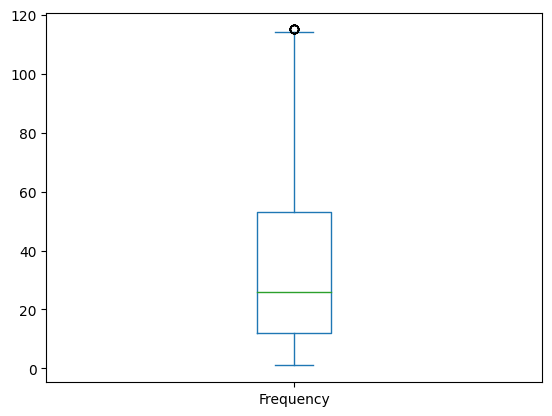

In [ ]:
# Dropando os Outlines da coluna Frequency
final_rfm.drop(final_rfm[final_rfm['Frequency'] >115].index, inplace=True)
final_rfm[final_rfm['Frequency'] > 115]
final_rfm["Frequency"].plot.box()

<Axes: >

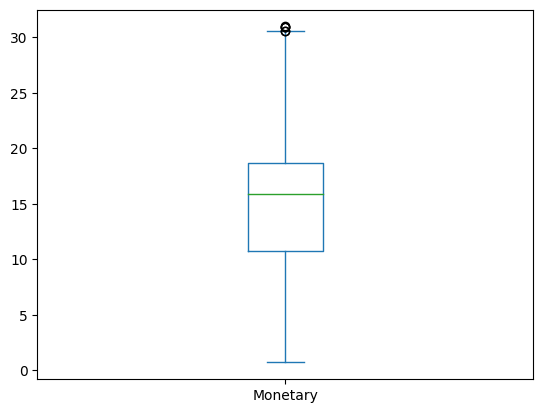

In [ ]:
# Dropando os Outlines da coluna Monetary
final_rfm.drop(final_rfm[final_rfm['Monetary'] >31].index, inplace=True)
final_rfm[final_rfm['Monetary'] > 31]
final_rfm["Monetary"].plot.box()

# **Plotando os gráficos com análise Kmeans**

In [ ]:
X= final_rfm.drop(columns=["CustomerID"])
kmeans = Kmeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

# Add the labels to the DataFrame
X['Cluster'] = labels

# Plotar o gráfico 3D com os pontos e os centroides
fig = px.scatter_3d(X, x='Recency', y='Frequency', z='Monetary', color='Cluster')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Analisandos os centroides
# Obter os centroides
centroids = kmeans.cluster_centers_

# Criar um DataFrame para os centroides
centroids_df = pd.DataFrame(centroids, columns=['Recency', 'Frequency', 'Monetary'])
centroids_df['Cluster'] = ['Centroid 1', 'Centroid 2', 'Centroid 3', 'Centroid 4']

# Plotar apenas os centroides em um gráfico 3D
fig = px.scatter_3d(centroids_df, x='Recency', y='Frequency', z='Monetary', color='Cluster')
fig.show()

In [ ]:
# Supomos que 'final_rfm' é o DataFrame inicial
# Definir X sem a coluna 'CustomerID'
X = final_rfm.drop(columns=["CustomerID"])

# Treinar o modelo KMeans
kmeans = Kmeans(n_clusters=4)
kmeans.fit(X)

# Adicionar as labels ao DataFrame
X['Cluster'] = kmeans.labels_

# Plotar o gráfico 3D com os pontos e os centroides
fig = px.scatter_3d(X, x='Recency', y='Frequency', z='Monetary', color='Cluster')
fig.show()

# Calcular a contagem de pontos em cada cluster
cluster_counts = X['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Calcular a porcentagem de pontos em cada cluster
total_points = len(X)
cluster_counts['Percentage'] = (cluster_counts['Count'] / total_points) * 100

# Plotar o gráfico de barras para visualizar a porcentagem de cada cluster
fig_bar = px.bar(cluster_counts, x='Cluster', y='Percentage', title='Porcentagem de Cada Cluster', labels={'Cluster': 'Cluster', 'Percentage': 'Porcentagem (%)'})
fig_bar.show()

# Plotar o gráfico de pizza para visualizar a porcentagem de cada cluster
fig_pie = px.pie(cluster_counts, values='Percentage', names='Cluster', title='Porcentagem de Cada Cluster')
fig_pie.show()

# Mostrar as porcentagens em formato de tabela
print(cluster_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



   Cluster  Count  Percentage
0        0   1257    39.28125
1        2    765    23.90625
2        3    635    19.84375
3        1    543    16.96875


# **Avaliação da quantidade de clauster (Elbow / Silhouette Score)**

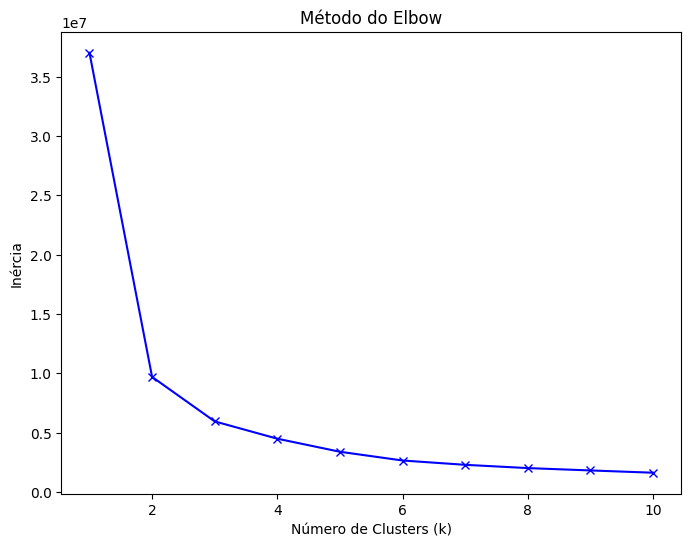

In [ ]:
# Supondo que final_rfm seja o seu DataFrame e a coluna 'CustomerID' exista
X = final_rfm.drop(columns=["CustomerID"])

# Método do Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = Kmeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Elbow')
plt.show()

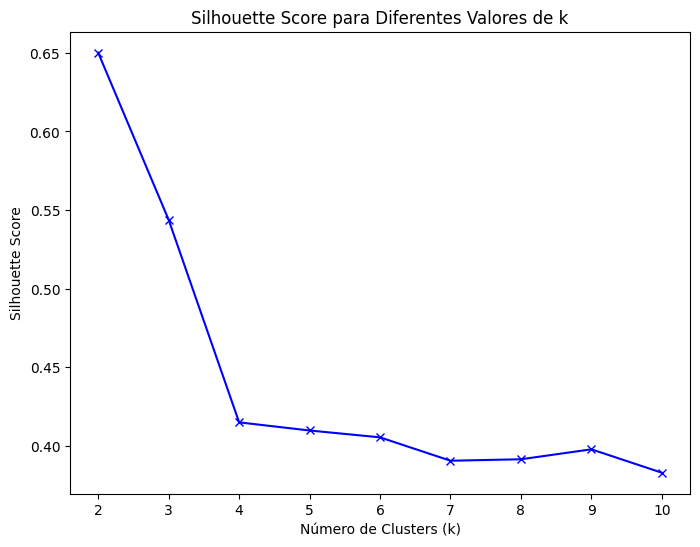

In [ ]:
# Método do Silhouette Score
silhouette_scores = []
K = range(2, 11)  # Silhouette Score não é definido para k=1
for k in K:
    kmeans = Kmeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Valores de k')
plt.show()

# **Gráficos para análise de padrões dos clientes**

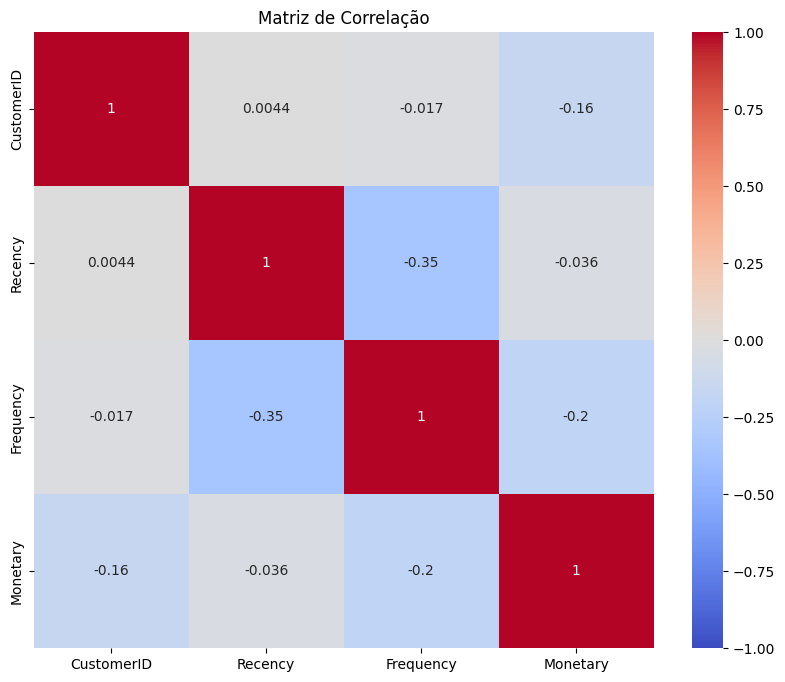

In [ ]:
# Calcular a matriz de correlação
corr_matrix = final_rfm.corr()

# Plotar a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

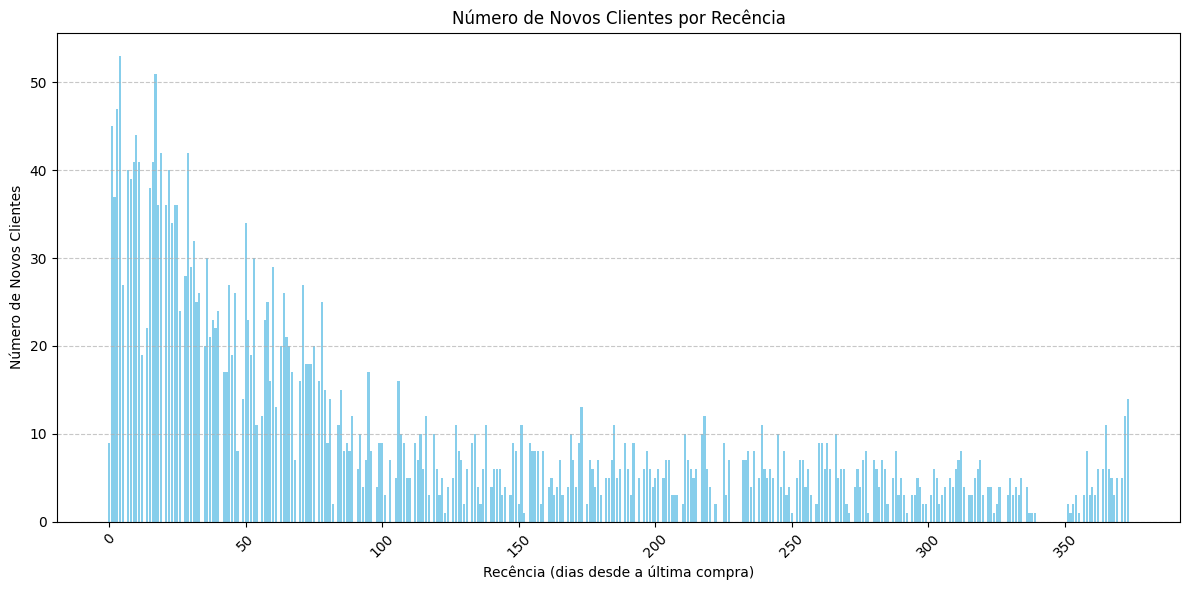

In [ ]:
# Identificar os novos clientes para cada valor único de Recency
novos_clientes_por_recencia = final_rfm.groupby('Recency')['CustomerID'].nunique().reset_index()
novos_clientes_por_recencia.columns = ['Recency', 'Novos Clientes']

# Ordenar os dados por Recency
novos_clientes_por_recencia = novos_clientes_por_recencia.sort_values(by='Recency')

# Plotar o gráfico de barras para visualizar a distribuição
plt.figure(figsize=(12, 6))
plt.bar(novos_clientes_por_recencia['Recency'], novos_clientes_por_recencia['Novos Clientes'], color='skyblue')
plt.xlabel('Recência (dias desde a última compra)')
plt.ylabel('Número de Novos Clientes')
plt.title('Número de Novos Clientes por Recência')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

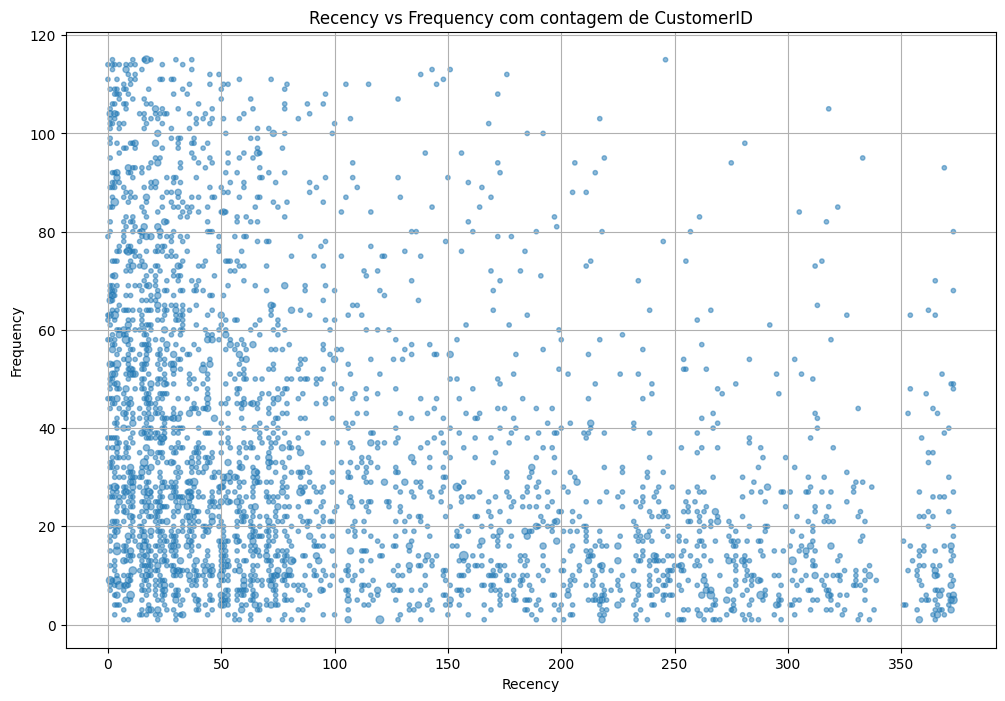

In [ ]:
# Agrupar os dados por Recency e Frequency e contar o número de CustomerID
dados_agrupados = final_rfm.groupby(['Recency', 'Frequency']).size().reset_index(name='CustomerID_Count')

# Plotar o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(dados_agrupados['Recency'], dados_agrupados['Frequency'], s=dados_agrupados['CustomerID_Count']*10, alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency com contagem de CustomerID')
plt.grid(True)
plt.show()

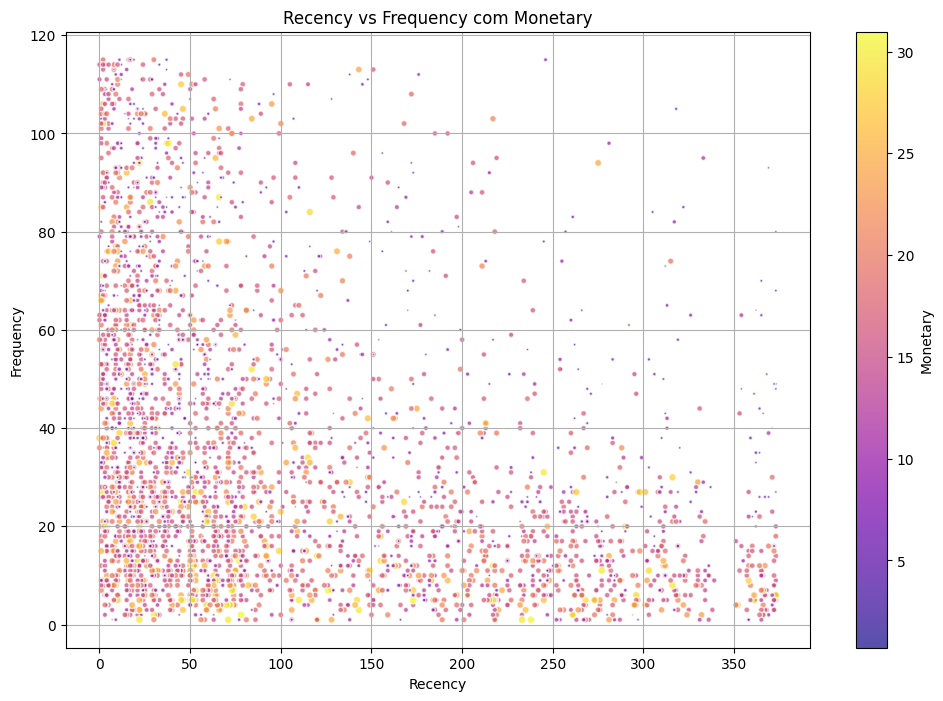

In [ ]:
# Definir as variáveis para o gráfico de dispersão
x = final_rfm['Recency']
y = final_rfm['Frequency']
sizes = final_rfm['Monetary']  # Tamanho das bolinhas baseado no Monetary
colors = final_rfm['Monetary']  # Cor das bolinhas baseado no Monetary

plt.figure(figsize=(12, 8))

# Plotar o gráfico de dispersão com cores variáveis por Monetary usando o mapa de cores 'plasma'
scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='plasma', alpha=0.7, edgecolors='w')

plt.colorbar(scatter, label='Monetary')  # Adicionar a barra de cor com a legenda 'Monetary'
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency com Monetary')
plt.grid(True)
plt.show()


# **Insights obitidos**


**1. Foram identificados 4 grupos de clientes, categorizados da seguinte forma:**

  * 1º Grupo: Possui um poder de compra moderado, porém realiza compras com baixa frequência e recência extremamente baixa, correspondendo a aproximadamente 17% de todos os dados.

  * 2º Grupo: Possui um poder de compra moderado, realiza compras com baixa frequência, mas apresenta uma recência um pouco maior. Este grupo é responsável por aproximadamente 19,8% de todos os clientes.

  * 3º Grupo: Considerado o maior grupo, caracteriza-se por um poder de compra muito alto e uma recência extremamente alta, porém com uma frequência baixa. Este grupo representa 39,3% de todos os dados.

  * 4º Grupo: Considerado o segundo maior grupo, compreende clientes que realizam compras menores, mas com alta frequência e recência. Este grupo é responsável por 23,9% dos dados.

**2.Justifique como essa análise pode ser útil para empresa para segmentação de
seus clientes e personalização das campanhas de marketing:**
  * 1. Personalização das Campanhas de Marketing
Relevância e Eficácia:
      * A segmentação permite que a empresa crie campanhas de marketing altamente direcionadas e relevantes para cada grupo de clientes. Por exemplo, campanhas diferentes podem ser desenvolvidas para clientes com alta recência e frequência em comparação com aqueles que compram com pouca frequência.
      * Aumento do ROI: Ao personalizar as campanhas, a empresa pode aumentar o retorno sobre o investimento (ROI) em marketing, uma vez que mensagens mais relevantes têm maior probabilidade de conversão.
* 2. Melhoria da Experiência do Cliente
Engajamento Apropriado:
      * Compreender as características e comportamentos distintos dos diferentes grupos de clientes permite à empresa oferecer experiências personalizadas, o que pode aumentar o engajamento e a lealdade do cliente.
      * Satisfação do Cliente: Clientes que se sentem compreendidos e valorizados são mais propensos a serem satisfeitos e a retornarem para futuras compras.
* 3. Otimização dos Recursos
      * Alocação Eficiente de Recursos: A empresa pode alocar seus recursos de marketing de maneira mais eficiente, concentrando esforços e orçamento nos segmentos de maior valor ou nos que necessitam de reengajamento.
      * Identificação de Oportunidades: A análise ajuda a identificar quais segmentos têm maior potencial de crescimento ou quais estão em risco de churn, permitindo ações proativas.
* 4. Estratégias de Fidelização e Retenção
Programas de Fidelidade Personalizados:
      * Com a segmentação, a empresa pode desenvolver programas de fidelidade que recompensem especificamente o comportamento de compra de cada grupo. Por exemplo, oferecer recompensas exclusivas para o grupo com alto poder de compra e recência elevada.
      * Redução do Churn: Estratégias de reengajamento podem ser implementadas para segmentos com baixa frequência e recência, reduzindo assim a taxa de abandono de clientes.
* 5. Desenvolvimento de Produtos e Serviços
Inovação e Ajuste de Oferta:
      * A compreensão detalhada dos diferentes segmentos de clientes pode informar o desenvolvimento de novos produtos ou serviços que atendam às necessidades específicas de cada grupo, aumentando a relevância da oferta da empresa.
      * Preços e Promoções: Ajustar estratégias de preços e promoções com base nas características dos segmentos, por exemplo, oferecendo descontos para incentivar a compra de grupos de baixa frequência.


**3 Ações de melhoria**

* 1. Campanhas de Reativação para o 1º e 2º Grupos
  * Objetivo: Aumentar a frequência e a recência de compras.

  * Ação: Desenvolver campanhas de marketing específicas para reativar esses clientes. Isso pode incluir:

      * Ofertas exclusivas e limitadas no tempo: Enviar cupons de desconto ou promoções especiais para incentivar compras rápidas.
      * Programa de fidelidade: Introduzir ou reforçar um programa de fidelidade que ofereça recompensas adicionais para compras frequentes.
      * E-mails personalizados: Utilizar e-mails personalizados com recomendações de produtos baseados em compras passadas para atrair a atenção desses clientes.

* 2. Programas VIP para o 3º Grupo
  * Objetivo: Manter e aumentar o valor das compras desses clientes de alto poder de compra.

  * Ação: Implementar programas VIP ou de alto valor para esses clientes. Isso pode incluir:

      * Acesso antecipado a novos produtos: Oferecer a esses clientes acesso exclusivo a lançamentos de produtos ou eventos.
      * Serviços personalizados: Disponibilizar serviços personalizados, como consultoria de produtos ou atendimento prioritário.
      * Recompensas premium: Proporcionar recompensas de alto valor, como descontos significativos, brindes exclusivos ou experiências especiais.
* 3. Promoções de Cross-Selling e Up-Selling para o 4º Grupo
  * Objetivo: Aumentar o ticket médio das compras.

  * Ação: Focar em estratégias de cross-selling (venda de produtos complementares) e up-selling (venda de produtos de maior valor) para clientes que já compram com frequência e recentemente. Isso pode incluir:

      * Sugestões personalizadas: Utilizar dados de compra para recomendar produtos complementares ou upgrades durante o processo de checkout.
      * Ofertas combinadas: Criar pacotes de produtos com descontos especiais para incentivar a compra de múltiplos itens.
      * Comunicações direcionadas: Enviar comunicações segmentadas com ofertas e produtos que complementam as compras recentes desses clientes.
